# Advertising Sales Channel Prediction

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The company has to select proper sales channel to predict the right sales channel to generate good revenue. 

In this model we predict our sales and what is the best medium of advertising to increase the revenue.

In [1]:
#Importing libraries

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [3]:
# load the dataset in DataFrame

In [4]:
df = pd.read_csv('Advertising.csv')

In [5]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [6]:
df.size

1000

In [7]:
df.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [8]:
df.tail(10)

,Unnamed: 0,TV,radio,newspaper,sales
190,191,39.5,41.1,5.8,10.8
191,192,75.5,10.8,6.0,9.9
192,193,17.2,4.1,31.6,5.9
193,194,166.8,42.0,3.6,19.6
194,195,149.7,35.6,6.0,17.3
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [9]:
df.shape

(200, 5)

In [10]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
df.columns.size

5

In [12]:
df.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

we can see all the features are float i.e. continous.

"Unnamed" had all unique values and not contributing anything in our dataset. That's why we drop this column.

In [13]:
df = df.drop(columns=['Unnamed: 0'])

In [14]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [15]:
df.columns.size

4

In [16]:
# new shape of our data after droping unnamed column.

In [17]:
df.shape

(200, 4)

In [18]:
df.size

800

# DESCRIBING DATA

In [19]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


The measures of central tendency and variability or distribution are some commonly used measures to define the data set. The measures used to define the central tendency are mean, median and mode. The standard deviations (or variance) are the minimum and maximum values of variables. The table above is a summary of some statistical measures for each numeric predictor of the dataset:

count indicates the number of records for each attribute that corresponds to the number of sales.

mean indicates the average value around which each group of attributes is attested.

std indicates the standard deviation of each attribute group, from which we can guess the degree of data dispersion around the average.

max and min indicate the attribute that I assume the highest and lowest value for each attribute group.

# Exploratory Data Analysis (EDA)

#### Univariate Analysis

In [20]:
# we use histogram for showing our continous variables.

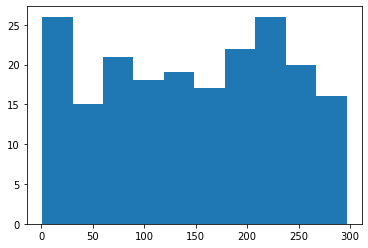

In [21]:
plt.hist(df["TV"])
plt.show()

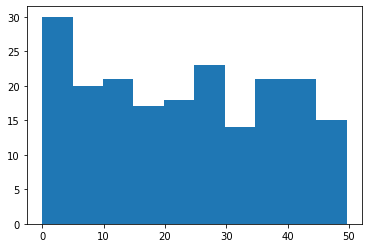

In [22]:
plt.hist(df["radio"])
plt.show()

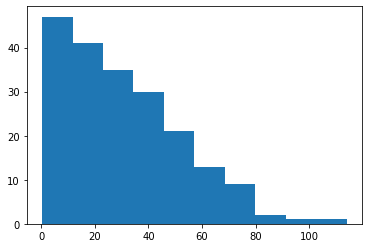

In [23]:
plt.hist(df["newspaper"])
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024D0E4EE970>,
      dtype=object)

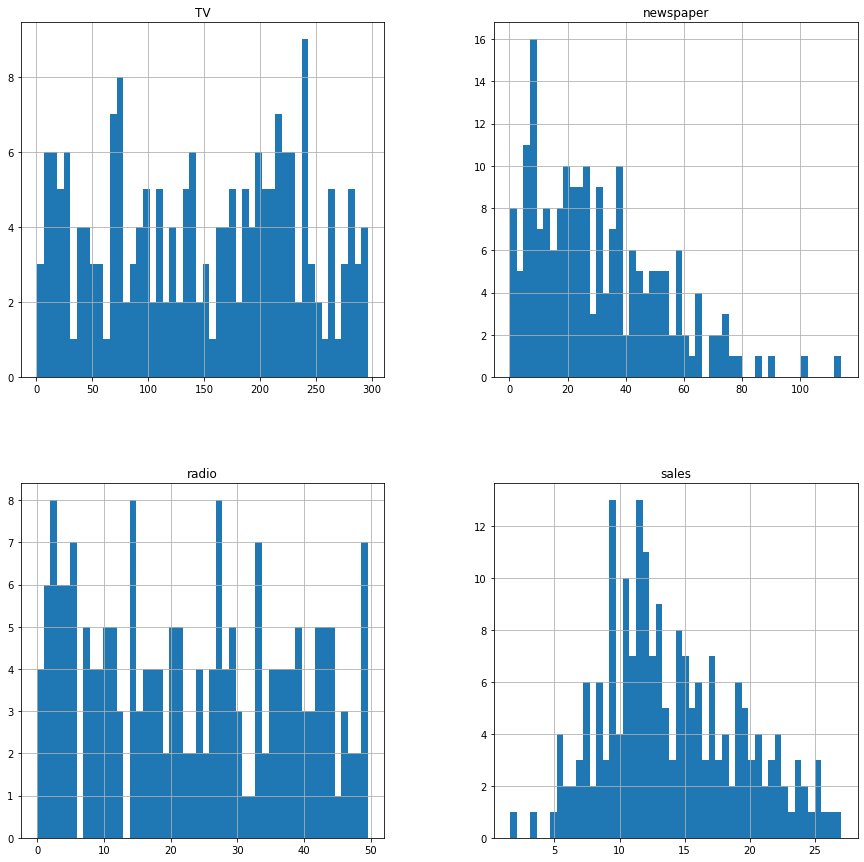

In [24]:
df.hist(bins=50,figsize=(15,15))

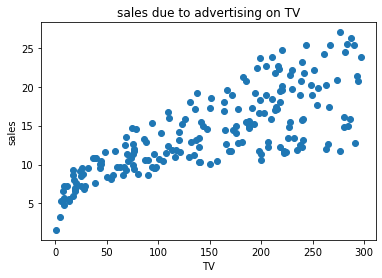

In [25]:
plt.scatter (df["TV"],df["sales"], label="sales")
plt.ylabel("sales")
plt.xlabel("TV")
plt.title("sales due to advertising on TV")

plt.show()

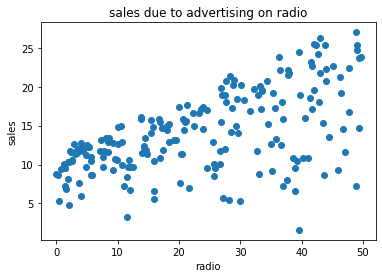

In [26]:
plt.scatter (df["radio"],df["sales"], label="sales")
plt.ylabel("sales")
plt.xlabel("radio")
plt.title("sales due to advertising on radio")

plt.show()

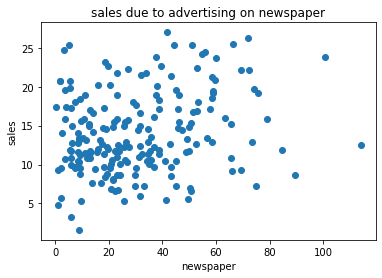

In [27]:
plt.scatter (df["newspaper"],df["sales"], label="sales")
plt.ylabel("sales")
plt.xlabel("newspaper")
plt.title("sales due to advertising on newspaper")

plt.show()

# FINDING CORRELATION

In [28]:
corr= df.corr()
corr

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


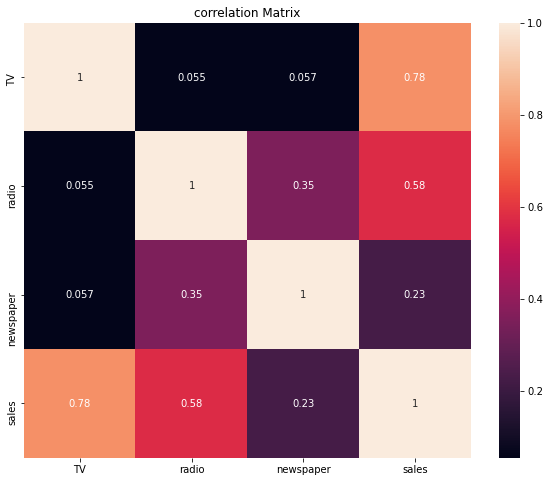

In [29]:
corr_mat=df.corr()   

plt.figure(figsize=[10,8])
sns.heatmap(corr_mat,annot=True)
plt.title("correlation Matrix")
plt.show()

In [30]:
corr_matrix=df.corr()
corr_matrix["sales"].sort_values(ascending=False)

sales        1.000000
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

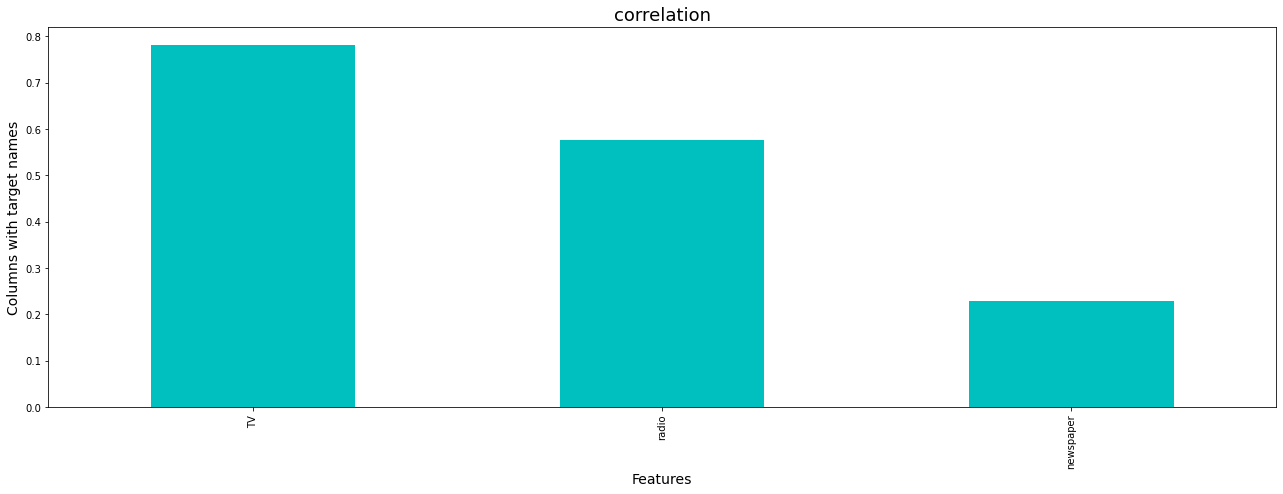

In [31]:
plt.figure(figsize=(22,7))
df.corr()["sales"].sort_values(ascending=False).drop(["sales"]).plot(kind="bar",color="c")
plt.xlabel("Features",fontsize=14)
plt.ylabel("Columns with target names", fontsize=14)
plt.title("correlation",fontsize=18)
plt.show

#### FINDINGS

we get an outcome from our visualization that due to advertising on TV, sales increases maximum and generated the maximum revenue.
or we can say there is a strong positive correlation between TV & sales.

The other medium of advertising which increase the sales maximum and generate revenue after TV is "radio".
Radio also have a good positive correlation with sales.

"newspaper" also has a posiotive relationship with sales.

# DATA PREPROCESSING

In [32]:
# cleaning our data

# checking missing values

In [33]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

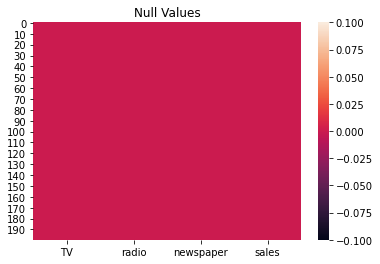

In [34]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

We can see in this dataset there is no null values. It means that this is a very clean data.

# Checking outliers

In [35]:
df.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

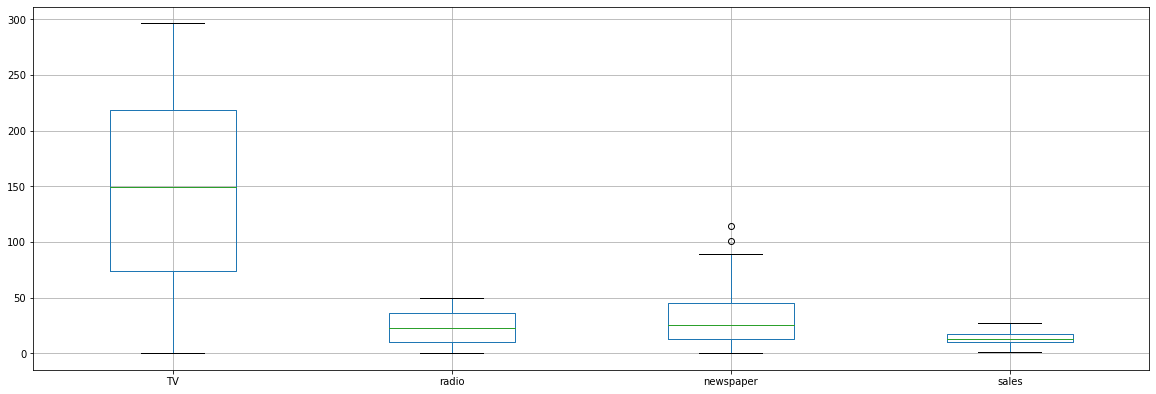

In [36]:
df.iloc[:,0:4].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show

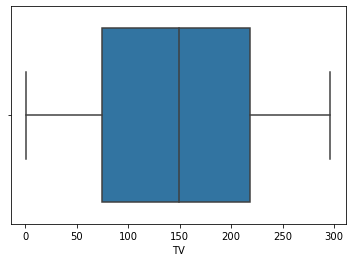

In [37]:
sns.boxplot(df["TV"])

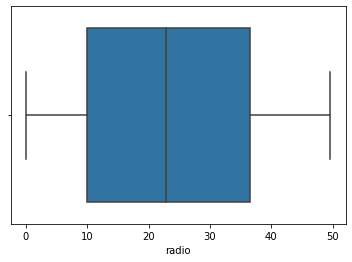

In [38]:
sns.boxplot(df["radio"])

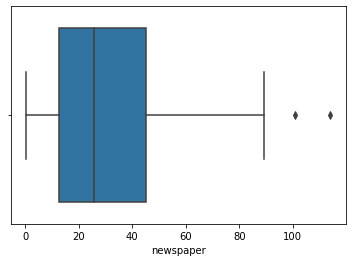

In [39]:
sns.boxplot(df["newspaper"])

we only have 2 outliers and they are very near to baseline.

It means they are not outliers and we don't need to treat them.

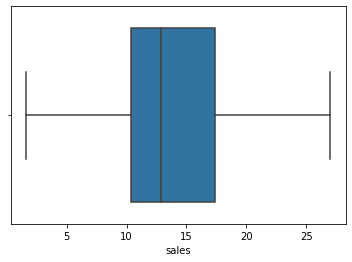

In [40]:
sns.boxplot(df["sales"])

# Checking Skweness

In [41]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

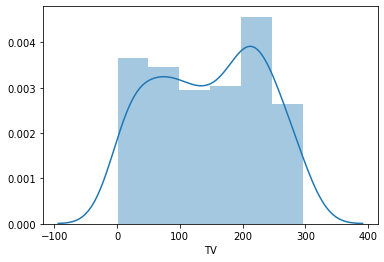

In [42]:
sns.distplot(df["TV"])

NORMALLY DISTRIBUTED GRAPH FOR TV.

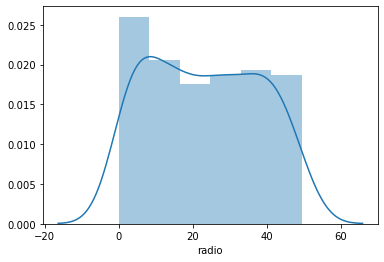

In [43]:
sns.distplot(df["radio"])

NORMALLY DISTRIBUTED GRAPH FOR RADIO.

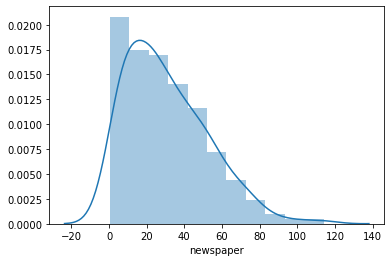

In [44]:
sns.distplot(df["newspaper"])

LITTLE RIGHT SKEWED. NO NEED TO CORRECT IT.

# Splitting the data into X & Y

x-----> INDEPENDENT VARIABLE-----> sales

y-----> DEPENDENT VARIABLE------> TV, radio, newspaper

In [45]:
x= df.drop("sales",axis=1)     # independent variable
y= df["sales"]                # dependent variable

In [46]:
x.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

# scaling

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler()

df=pd.DataFrame(scaler.fit_transform(df), columns= df.columns)

In [48]:
df

,TV,radio,newspaper,sales
0,0.775786,0.762097,0.605981,0.807087
1,0.148123,0.792339,0.394019,0.346457
2,0.055800,0.925403,0.606860,0.303150
3,0.509976,0.832661,0.511873,0.665354
4,0.609063,0.217742,0.510994,0.444882
...,...,...,...,...
195,0.126818,0.074597,0.118734,0.236220
196,0.316199,0.098790,0.068602,0.318898
197,0.596212,0.187500,0.053650,0.440945
198,0.956713,0.846774,0.579595,0.940945


Now every column value is between 0 & 1. We can compare the data more accurately.

# FINDING BEST RANDOM STATE

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0

for i in range (1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.30, random_state=i)
    LR= LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu,"on Random_state", maxRS)

Best accuracy is 0.933219070930032 on Random_state 13


# CREATING TRAIN TEST SPLIT

### RandomForestRegressor

#### ENSEMBLE TECHNIQUE

In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error

rf= RandomForestRegressor(random_state=13)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score                : ",r2_score(y_test,predrf))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,predrf)))

R2 Score                :  0.9822951444486336
Root Mean Squared Error :  0.6744257433797538


The r2 score varies between 0 and 100% The proportion of the variance in the dependent variable that is predictable from the independent variables. i.e. change coming in y whenever x is being changed.

Root Mean Square Error is the measure of how well a regression line fits the data points. A good practice is to make sure that the mean squared error is low.

### AdaBoostRegressor

In [52]:
from sklearn.ensemble import AdaBoostRegressor

ad= AdaBoostRegressor(n_estimators=100)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("R2 Score                : ",r2_score(y_test,predad))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,predad)))


R2 Score                :  0.9571269509248211
Root Mean Squared Error :  1.0494944129360075


### DecisionTreeRegressor

In [53]:
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor(random_state=54)
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("R2 Score                : ",r2_score(y_test,preddt))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,preddt)))


R2 Score                :  0.956313628874092
Root Mean Squared Error :  1.059402347237976


### Support Vector Regressor

In [54]:
from sklearn.svm import SVR

svr= SVR(kernel="linear")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)
print("R2 Score                : ",r2_score(y_test,pred_y))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,pred_y)))


svr=SVR(kernel="poly")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)
print("R2 Score                : ",r2_score(y_test,pred_y))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,pred_y)))



svr=SVR(kernel="rbf")
svr.fit(x_train,y_train)
svr.score(x_train,y_train)
pred_y=svr.predict(x_test)
print("R2 Score                : ",r2_score(y_test,pred_y))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,pred_y)))



R2 Score                :  0.9276753099761965
Root Mean Squared Error :  1.3631110420991432
R2 Score                :  0.8312639756230584
Root Mean Squared Error :  2.0820533405149626
R2 Score                :  0.8224876081511485
Root Mean Squared Error :  2.1355133135106676


# cross_val_score with Ensemble Technique

In [55]:
from sklearn.model_selection import cross_val_score

rf= RandomForestRegressor(random_state=13)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score of RandomForestRegressor : ",r2_score(y_test,predrf))

scr=cross_val_score(rf,x,y,cv=5)
print("cross validation score of RandomForestRegressor model:", scr.mean())

R2 Score of RandomForestRegressor :  0.9822951444486336
cross validation score of RandomForestRegressor model: 0.9754532059204315


we are getting model accuracy and cross validation both near 98%, which shows our model is performing extremely well and there is no case of overfitting.

# Hyperparameter tunning with best model

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameters = {'criterion':('mse', 'mae'), "max_features":["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [58]:
clf_pred=clf.best_estimator_.predict(x_test)

In [59]:
r2_score(y_test,clf_pred)

0.9829820934966623

we are getting 98% accuracy with our model. It means our model is performing very well.

# SAVING OUR MODEL

In [63]:
import pickle
filename= "AdvertisingSales.pkl"
pickle.dump(rf,open(filename,"wb"))